# Demonstration of various configurations of the universe

Chosen method: <b><i> Method 2</i></b>

Imports and variables:

In [155]:
import numpy as np
import matplotlib.pyplot as plt

TAU = np.pi*2
chords_to_draw = 100

# size of the 'universe'
r = 100

Define necessary methods:

In [156]:
# Returns Boolean
def intersects(line,circles):
    x1,x2 = line[0][0], line[1][0]
    y1,y2 = line[0][1], line[1][1]
    
    for circle in circles:
        center = circle.center
        radius = circle.radius

        gradient = (y2-y1)/(x2-x1)
        intercept = y2-(gradient*x2)
        
        # equation for closest approach to a point (circle center) given a line equation
        distance = (np.abs(gradient*center[0] - center[1] + intercept))/(np.sqrt(gradient**2 + 1))
        
        if distance <= radius:
            # first time it detects an intersect, exit the loop as the chord is invalid
            return True
    
    # if no intersect is detected
    return False

In [157]:
# Returns Boolean
def draw_chord(p1,p2,c1,thickness):
    x1,x2 = p1[0], p2[0]
    y1,y2 = p1[1], p2[1]

    if intersects((p1,p2), c1):
        plt.plot([x1,x2],[y1,y2],'red',linewidth=thickness)
        return True
    else:
        plt.plot([x1,x2],[y1,y2],'green',linewidth=thickness)
        return False

In [158]:
# Return pair of floats

def get_coords(r,theta):
    return r * np.cos(theta), r * np.sin(theta)

def get_chord(x,y,r,angle):
    chord_length = np.sqrt(r**2 - (np.sqrt(x**2 + y**2))**2)
    p1 = x + chord_length * np.cos(angle), y + chord_length * np.sin(angle)
    p2 = x - chord_length * np.cos(angle), y - chord_length * np.sin(angle)

    return p1,p2

Generate random chords:

In [159]:
def generate_chords(chords_to_draw):
    chords = []

    for i in range(chords_to_draw):
        # generate random radius angle
        angle = np.random.uniform() * TAU
        x, y = get_coords(r,angle)

        # subtract 90 degrees (pi/2) to get perpendicular
        angle_perp = angle - np.pi/2

        # choose a random radius length
        r_length = np.random.uniform() * r
        x, y = get_coords(r_length, angle)

        # generates chord perpendicular to end of partial radius
        p1, p2 = get_chord(x,y,r,angle_perp)

        chords.append((p1,p2))
    return chords

Define body/bodies within universe:

In [160]:
universe = plt.Circle((0,0), r, color='black', fill=False)

bodies = []
body_data = [((0,35),10), 
             ((0,-35),10)]

for d in body_data:
    bodies.append(plt.Circle(d[0],d[1],color='blue',fill=False))

Plot:

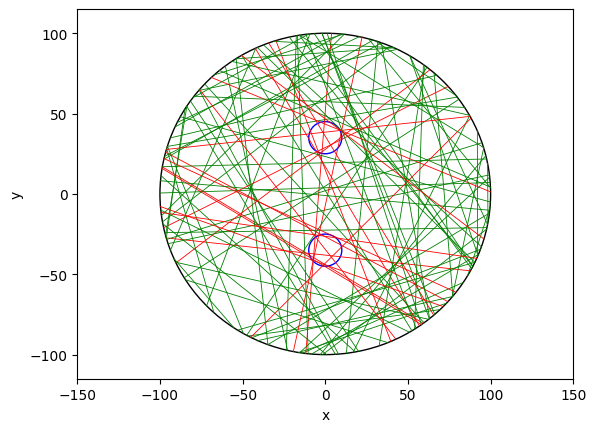

In [161]:
fig, ax = plt.subplots()
#ax.grid()
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_xlim((-r - 0.5*r, r + 0.5*r)), ax.set_ylim((-r - 0.15*r, r + 0.15*r))
ax.add_artist(universe)
for body in bodies:
    ax.add_artist(body)

results = []

total = chords_to_draw
chords = generate_chords(chords_to_draw)

for i in range(len(chords)):
    if draw_chord(chords[i][0],chords[i][1],bodies,0.6):
        total -= 1

In [162]:
valid = str(total)
invalid = str(chords_to_draw-total)

print(valid + " valid chords\n" + invalid + " invalid chords\n")

s = str(np.log(total))
s_normalised = str(np.log(total/chords_to_draw))

print(s + " is the entropy without normalisation\n" + s_normalised + " is the entropy with normalisation")

81 valid chords
19 invalid chords

4.394449154672439 is the entropy without normalisation
-0.21072103131565253 is the entropy with normalisation


Simulate model 1000 times with 100000 ray paths and store data:

In [163]:
results = []

for i in range(1000):
    bodies = []
    body_data = [((0, 5 + 0.03*i),10), 
                 ((0,-5 - 0.03*i),10)]

    for d in body_data:
        bodies.append(plt.Circle(d[0],d[1],color='blue',fill=False))

    total = 100000
    chords = generate_chords(100000)

    for i in range(len(chords)):
        if intersects((chords[i][0],chords[i][1]),bodies):
            total -= 1

    valid = total
    invalid = 100000-total

    results.append((valid,invalid,np.log(valid/100000),round(bodies[0].center[1],2) - round(bodies[1].center[1],3)))

entropy_distance_data = []
for val in results:
    entropy_distance_data.append((val[2],val[3]))

[(-0.14363945020161079, 10.0),
 (-0.14084953358812993, 10.06),
 (-0.14171334512362457, 10.12),
 (-0.14186314836311179, 10.18),
 (-0.14117193594906546, 10.24),
 (-0.1423588113224542, 10.3),
 (-0.14269323441690887, 10.36),
 (-0.14414754508771194, 10.42),
 (-0.14117193594906546, 10.48),
 (-0.14314315222797666, 10.54),
 (-0.14650663677550615, 10.6),
 (-0.14370872066817503, 10.66),
 (-0.1439512050955123, 10.72),
 (-0.14417064644491773, 10.78),
 (-0.14285472008540678, 10.84),
 (-0.14635613636134598, 10.9),
 (-0.14590477097340757, 10.96),
 (-0.14558083936641947, 11.02),
 (-0.14555770540923937, 11.08),
 (-0.14470212500764712, 11.14),
 (-0.1476419079144325, 11.2),
 (-0.14628668227047217, 11.26),
 (-0.14610149494138583, 11.32),
 (-0.14659926367442389, 11.38),
 (-0.1474796473932202, 11.44),
 (-0.14691194281606149, 11.5),
 (-0.1449564102939902, 11.56),
 (-0.1473174131962133, 11.62),
 (-0.14911504660365585, 11.68),
 (-0.14794331875127453, 11.74),
 (-0.14712044990605788, 11.8),
 (-0.1488364918368272

Write data to external file for use in plotting:

In [165]:
data_to_write = []
for d in entropy_distance_data:
    data_to_write.append(d[0])
    data_to_write.append(d[1])

In [166]:
entropy_file = open("entropy_data.txt", "w")
for d in data_to_write:
    entropy_file.write(str(d)+",")
entropy_file.close()